<a href="https://colab.research.google.com/github/IMHOSUNG/Keras_Study/blob/master/KerasExample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다층 퍼셉트론 신경망 모델



### 데이터 준비

[Link ] : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [0]:
# Google 드라이브를 마운트하려면 이 셀을 실행하세요.
# 마운트를 한 후 keggle에서 파일을 받아 구글 드라이브에 업로드 할 것 
from google.colab import drive
drive.mount('/content/drive')

### test 라는 디렉토리를 새로 만들어서 그 안에 데이터를 넣음 <ls명령어를 통한 확인>

In [23]:
!ls ./drive/'My Drive'/test/

diabetes.csv


랜덤 시드 고정 이유
- 매번 실행 시마다 결과가 달라지지 않도록 랜덤 시드를 명시적으로 정한다. 이것을 지정하지 않으면 매번 실행 시마다 동일 모델임에도 불구하고 다른 결과가 나온다. 

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

#랜덤 시드 생성
np.random.seed(5)

#첫번 째 줄 지우기 <카테고리 줄 지우기>
with open("./drive/My Drive/test/diabetes.csv",'r') as f:
    with open("updated_diabetes.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)

#새로 생성된 diabets을 dataset으로 읽는다.
dataset = np.loadtxt("updated_diabets.csv", delimiter =",")

#dataset 확인
print(dataset)


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


### 데이터셋 생성하기

- 데이터셋 구조
  + 속성값 8개를 통한 입력
  + 판정 결과 1개 변수로 출력 

In [0]:
#700개 까지 0~7의 속성을 읽어 8 마지막 1과 0의 결과 값을 확인
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]

x_test = dataset[700:,0:8]
y_test = dataset[700:,8]



### 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

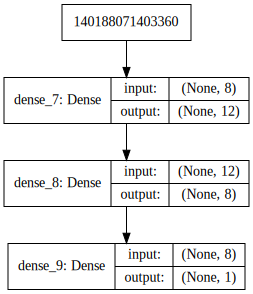

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 모델 학습 과정 설정 및 학습

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1500, batch_size = 64)



### 모델 평가하기 

In [29]:
scores = model.evaluate(x_test, y_test)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 690us/step
acc : 76.47%
